In [14]:
from collections import defaultdict

grid = [
    ['O', 'O', 'X', 'O', 'T'],
    ['O', 'X', 'O', 'O', 'X'],
    ['P', 'O', 'O', 'X', 'O'],
    ['X', 'X', 'O', 'O', 'O'],
    ['O', 'O', 'O', 'X', 'O'],
]

directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

rows, cols = len(grid), len(grid[0])
adj_list = defaultdict(list)

for r in range(rows):
    for c in range(cols):
        if grid[r][c] == 'O' or grid[r][c] == 'P' or grid[r][c] == 'T':
            node = (r, c)
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < rows and 0 <= nc < cols and (grid[nr][nc] == 'O' or grid[nr][nc] == 'P' or grid[nr][nc] == 'T'):
                    adj_list[node].append((nr, nc))


def bfs(adj_list, start, goal):
    visited = set()
    queue = [start]
    parent = {}

    parent[start] = None
    visited.add(start)

    while queue:
        node = queue.pop(0)

        if node == goal:
            print('Goal Found')
            path = []
            while node is not None:
                path.append(node)
                node = parent[node]
            path.reverse()
            print("Path: ", path) 
            return

        for neighbour in adj_list[node]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)
                parent[neighbour] = node 
    print('Goal not found')

def dfs(adj_list, start, goal):
    visited = set()
    stack = [start]
    parent = {}

    parent[start] = None
    visited.add(start)

    while stack:
        node = stack.pop()

        if node == goal:
            print('Goal Found!')
            path = []
            while node is not None:
                path.append(node)
                node = parent[node]
            path.reverse()
            print("Path: ", path)
            return
        
        for neighbour in reversed(adj_list[node]):
            if neighbour not in visited:
                visited.add(neighbour)
                stack.append(neighbour)
                parent[neighbour] = node
    print("Goal not found!")

start = (2, 0)
goal = (0, 4)

bfs(adj_list, start, goal)
dfs(adj_list, start, goal)


Goal Found
Path:  [(2, 0), (2, 1), (2, 2), (1, 2), (1, 3), (0, 3), (0, 4)]
Goal Found!
Path:  [(2, 0), (2, 1), (2, 2), (1, 2), (1, 3), (0, 3), (0, 4)]


Goal Found!


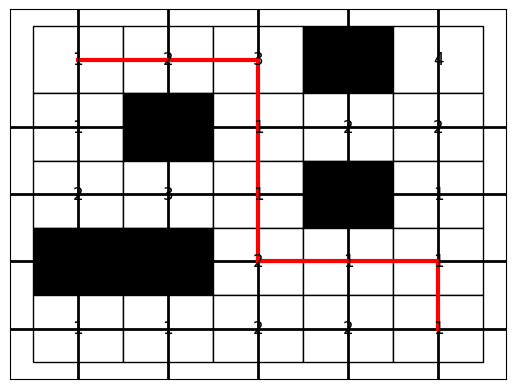

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]

In [4]:
from collections import defaultdict
import heapq
import numpy as np
import matplotlib.pyplot as plt

grid = [
    ['1', '2', '3', '#', '4'],
    ['1', '#', '1', '2', '2'],
    ['2', '3', '1', '#', '1'],
    ['#', '#', '2', '1', '1'],
    ['1', '1', '2', '2', '1'],
]

row, col = len(grid), len(grid[0])

directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

adj_list = defaultdict(list)

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Build adjacency list
for r in range(row):
    for c in range(col):
        if grid[r][c] != '#':  
            node = (r, c)
            for dr, dc in directions:
                nr, nc = r + dr, c + dc
                if 0 <= nr < row and 0 <= nc < col and grid[nr][nc] != '#':
                    adj_list[node].append(((nr, nc), int(grid[nr][nc])))

def visualize_path(grid, path):
    grid_array = np.array(grid)
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(len(grid[0]) + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(len(grid)) - 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

    # Convert grid to numerical values for visualization
    colors = {'#': 'black', '*': 'red'}
    for r in range(len(grid)):
        for c in range(len(grid[0])):
            value = grid_array[r, c]
            color = colors.get(value, 'white')
            rect = plt.Rectangle((c, len(grid) - r - 1), 1, 1, facecolor=color, edgecolor="black")
            ax.add_patch(rect)
            if value.isdigit():
                ax.text(c + 0.5, len(grid) - r - 1 + 0.5, value, ha='center', va='center', fontsize=12, color="black")

    # Draw path
    for i in range(len(path) - 1):
        y1, x1 = len(grid) - path[i][0] - 1, path[i][1]
        y2, x2 = len(grid) - path[i + 1][0] - 1, path[i + 1][1]
        ax.plot([x1 + 0.5, x2 + 0.5], [y1 + 0.5, y2 + 0.5], "r-", linewidth=3)

    plt.show()

# Modify A* to call visualize_path
def a_star(adj_list, start, goal):
    pq = []
    heapq.heappush(pq, (heuristic(start, goal), start))

    g_score = {start: 0}
    parent = {start: None}

    while pq:
        _, node = heapq.heappop(pq)

        if node == goal:
            print("Goal Found!")
            path = []
            while node is not None:
                path.append(node)
                node = parent[node]
            path.reverse()
            # print("Path:", path)

            # Call the visualization function
            visualize_path(grid, path)
            return path
        
        for neighbour, cost in adj_list[node]:
            new_g = g_score[node] + cost

            if neighbour not in g_score or new_g < g_score[neighbour]:
                g_score[neighbour] = new_g
                f_score = new_g + heuristic(neighbour, goal)
                heapq.heappush(pq, (f_score, neighbour))
                parent[neighbour] = node

    print('Goal Not Found')
    return None

# Run A* search with visualization
a_star(adj_list, (0, 0), (row - 1, col - 1))



In [19]:
import random

n = 8

# Fitness function: counts non-attacking pairs of queens
def calculate_fitness(individual):
    non_attacking_pairs = 0
    total_pairs = n * (n - 1) // 2 # Maximum possible non-attacking pairs
    # Check for conflicts
    for i in range(n):
        for j in range(i + 1, n):
            # No same column or diagonal conflict
            if individual[i] != individual[j] and abs(individual[i] - individual[j]) != abs(i - j):
                non_attacking_pairs += 1
    # Fitness score is the ratio of non-attacking pairs
    return non_attacking_pairs / total_pairs

# Generate a random individual (chromosome) based on column positions
def create_random_individual():
    return random.sample(range(n), n) # Ensure unique column positions

# Create an initial population of random individuals
population_size = 10

# Select the best routes (parents) based on fitness
def select_parents(population, fitness_scores):
    # Select top 50% of the population
    sorted_population = [board for _, board in sorted(zip(fitness_scores, population), reverse=True)]
    return sorted_population[:len(population)//2]

# Crossover function: single-point crossover with unique column
def crossover(parent1, parent2):
    point = random.randint(1, n - 2) # Choose a crossover point
    child = parent1[:point] + parent2[point:]
    # Ensure unique column positions
    missing = set(range(n)) - set(child)
    duplicates = [col for col in child if child.count(col) > 1]
    for i in range(len(child)):
        if child.count(child[i]) > 1:
            child[i] = missing.pop()
    return child

# Randomly swap two locations in a route
def mutate(individual):
    idx1, idx2 = random.sample(range(n), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

mutation_rate = 0.1

# Genetic Algorithm for the N-Queens Problem
def genetic_algorithm():
    population = [create_random_individual() for _ in range(population_size)]
    generation = 0
    best_fitness = 0

    while best_fitness < 1.0 and generation < 100:
        fitness_scores = [calculate_fitness(ind) for ind in population]
        best_fitness = max(fitness_scores)
        print(f"Generation {generation} Best Fitness: {best_fitness}")

        # Check for optimal solution
        if best_fitness == 1.0:
            break

        # Selection
        parents = select_parents(population, fitness_scores)

        # Crossover
        new_population = [
            crossover(random.choice(parents), random.choice(parents)) for _ in range(population_size)
        ]

        # Mutation
        for i in range(len(new_population)):
            if random.random() < mutation_rate:
                new_population[i] = mutate(new_population[i])

        population = new_population
        generation += 1

    # Return the best solution
    best_individual = max(population, key=calculate_fitness)
    return best_individual, calculate_fitness(best_individual)

# Run the Genetic Algorithm
solution, fitness = genetic_algorithm()
print("Best Solution:", solution)
print("Best Fitness:", fitness)


Generation 0 Best Fitness: 0.8928571428571429
Generation 1 Best Fitness: 0.9285714285714286
Generation 2 Best Fitness: 0.9285714285714286
Generation 3 Best Fitness: 0.9285714285714286
Generation 4 Best Fitness: 0.9285714285714286
Generation 5 Best Fitness: 0.9285714285714286
Generation 6 Best Fitness: 0.9285714285714286
Generation 7 Best Fitness: 0.9285714285714286
Generation 8 Best Fitness: 0.9642857142857143
Generation 9 Best Fitness: 0.9642857142857143
Generation 10 Best Fitness: 0.9642857142857143
Generation 11 Best Fitness: 0.9642857142857143
Generation 12 Best Fitness: 0.9642857142857143
Generation 13 Best Fitness: 0.9642857142857143
Generation 14 Best Fitness: 0.9642857142857143
Generation 15 Best Fitness: 0.9642857142857143
Generation 16 Best Fitness: 0.9642857142857143
Generation 17 Best Fitness: 0.9642857142857143
Generation 18 Best Fitness: 0.9642857142857143
Generation 19 Best Fitness: 0.9642857142857143
Generation 20 Best Fitness: 0.9642857142857143
Generation 21 Best Fitn

In [12]:
import random

def calculate_fitness(x):
    return 2*x*x - 1

def binary_to_decimal(binary_str):
    return int(binary_str, 2)

def create_random_individual():
    return "{:06b}".format(random.randint(0 ,31))

def generate_population(size):
    return [create_random_individual() for _ in range(size)]

def tournament_selection(population, fitness_scores, k=3):
    selected = random.sample(list(zip(population, fitness_scores)), k)
    selected.sort(key=lambda x: x[1], reverse=True)
    return selected[0][0]

def uniform_crossover(parent1, parent2):
    child = "".join(
        parent1[i] if random.random() < 0.5 else parent2[i] for i in range(len(parent1))
    )
    return child

def adaptive_mutation(individual, generation, max_generation):
    base_mutation_rate = 0.1
    adaptive_rate = base_mutation_rate * (1 - (generation / max_generation))

    mutated = "".join(
        str(1 - int(bit)) if random.random() < adaptive_rate else bit for bit in individual
    )

    return mutated

def genetic_algorithm(pop_size = 10, generations = 1000):
    population = generate_population(pop_size)

    for generation in range(generations):
        fitness_scores = [calculate_fitness(binary_to_decimal(x)) for x in population]

        best_individual = population[fitness_scores.index(max(fitness_scores))]
        best_fitness = max(fitness_scores)

        print(f"Generation {generation}: Best Fitness = {best_fitness}, Best Individual = {best_individual}")

        # Selection
        parents = [tournament_selection(population, fitness_scores) for _ in range(pop_size)]

        # Crossover
        new_population = [uniform_crossover(random.choice(parents), random.choice(parents)) for _ in range(pop_size)]

        # Mutation
        new_population = [adaptive_mutation(ind, generation, generations) for ind in new_population]

        population = new_population
    
    final_fitness_scores = [calculate_fitness(binary_to_decimal(x)) for x in population]
    best_individual = population[final_fitness_scores.index(max(final_fitness_scores))]
    return best_individual, calculate_fitness(binary_to_decimal(best_individual))

best_solution, best_fitness = genetic_algorithm()
print("\nBest Solution:", best_solution, "Decimal Value:", binary_to_decimal(best_solution))
print("Best Fitness:", best_fitness)

Generation 0: Best Fitness = 967, Best Individual = 010110
Generation 1: Best Fitness = 6727, Best Individual = 111010
Generation 2: Best Fitness = 6727, Best Individual = 111010
Generation 3: Best Fitness = 7687, Best Individual = 111110
Generation 4: Best Fitness = 7687, Best Individual = 111110
Generation 5: Best Fitness = 7937, Best Individual = 111111
Generation 6: Best Fitness = 7937, Best Individual = 111111
Generation 7: Best Fitness = 7937, Best Individual = 111111
Generation 8: Best Fitness = 7937, Best Individual = 111111
Generation 9: Best Fitness = 7937, Best Individual = 111111
Generation 10: Best Fitness = 7937, Best Individual = 111111
Generation 11: Best Fitness = 7937, Best Individual = 111111
Generation 12: Best Fitness = 7937, Best Individual = 111111
Generation 13: Best Fitness = 7937, Best Individual = 111111
Generation 14: Best Fitness = 7937, Best Individual = 111111
Generation 15: Best Fitness = 7937, Best Individual = 111111
Generation 16: Best Fitness = 7937,

In [16]:
'''
Maximize a Polynomial Function

Problem Statement:
Optimize the function:
    f(x)=3x^3 - 5x^2 + 2x - 7
where x is in the range [0, 63].

1- Represent individuals as 6-bit binary strings.
2- Use roulette wheel selection for parent selection.
3- Apply two-point crossover instead of uniform crossover.
4- Use a mutation probability that decreases over generations.
5- Run the algorithm for 500 generations and return the best solution.
'''

import random

def calculate_fitness(x):
    return (3 * pow(x, 3)) - (5 * pow(x, 2)) + (2 * x) - 7

def binary_to_decimal(binary_str):
    return int(binary_str, 2)

def generate_random_individual():
    return "{:06b}".format(random.randint(0, 63))

def generate_population(size):
    return [generate_random_individual() for _ in range(size)]

def roulette_wheel(population, fitness):
    total_fitness = sum(fitness)
    probabilities = [f / total_fitness for f in fitness]

    cumulative_prob = []
    cumulative_sum = 0
    for p in probabilities:
        cumulative_sum += p
        cumulative_prob.append(cumulative_sum)

    r = random.random()
    for i, cp in enumerate(cumulative_prob):
        if r < cp:
            return population[i]

def two_point_crossover(parent1, parent2):
    length = len(parent1)

    point1, point2 = sorted(random.sample(range(1, length - 1), 2))

    return parent1[:point1] + parent2[point1:point2] + parent1[point2:]

def adaptive_mutation(individual, generation, max_generation):
    base_mutation_rate = 0.1
    adaptive_rate = base_mutation_rate * (1 - generation / max_generation)

    mutated = "".join(
        str(1 - int(bit)) if random.random() < adaptive_rate else bit for bit in individual
    )

    return mutated

def genetic_algorithm(pop_size=10, generations=500):
    population = [generate_random_individual() for _ in range(pop_size)]

    for generation in range(generations):
        fitness_scores = [calculate_fitness(binary_to_decimal(x)) for x in population]

        best_individual = population[fitness_scores.index(max(fitness_scores))]
        best_fitness = max(fitness_scores)

        print(f"Generation {generation}: Best Fitness = {best_fitness}, Best Individual = {best_individual}")

        # Selection
        parents = [roulette_wheel(population, fitness_scores) for _ in range(pop_size)]

        # Crossover
        new_population = [two_point_crossover(random.choice(parents), random.choice(parents)) for _ in range(pop_size)]

        # Mutation
        new_population = [adaptive_mutation(ind, generation, generations) for ind in new_population]

        population = new_population
    
    new_fitness_scores = [calculate_fitness(binary_to_decimal(x)) for x in population]
    best_individual = population[new_fitness_scores.index(max(new_fitness_scores))]

    return best_individual, calculate_fitness(binary_to_decimal(best_individual))

best_solution, best_fitness = genetic_algorithm()
print("\nBest Solution:", best_solution, "Decimal Value:", binary_to_decimal(best_solution))
print("Best Fitness:", best_fitness)

Generation 0: Best Fitness = 730415, Best Individual = 111111
Generation 1: Best Fitness = 730415, Best Individual = 111111
Generation 2: Best Fitness = 730415, Best Individual = 111111
Generation 3: Best Fitness = 730415, Best Individual = 111111
Generation 4: Best Fitness = 730415, Best Individual = 111111
Generation 5: Best Fitness = 695881, Best Individual = 111110
Generation 6: Best Fitness = 730415, Best Individual = 111111
Generation 7: Best Fitness = 730415, Best Individual = 111111
Generation 8: Best Fitness = 730415, Best Individual = 111111
Generation 9: Best Fitness = 730415, Best Individual = 111111
Generation 10: Best Fitness = 730415, Best Individual = 111111
Generation 11: Best Fitness = 695881, Best Individual = 111110
Generation 12: Best Fitness = 730415, Best Individual = 111111
Generation 13: Best Fitness = 730415, Best Individual = 111111
Generation 14: Best Fitness = 730415, Best Individual = 111111
Generation 15: Best Fitness = 730415, Best Individual = 111111
Ge